In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('/content/Social_Network_Ads.csv')
df.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [ ]:
df.shape

(400, 5)

In [ ]:
df.Purchased.unique()

array([0, 1])

In [ ]:
df.Purchased.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [ ]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df=df.drop(columns=['User ID'],axis=1)
df.head()

Gender  Age  EstimatedSalary  Purchased
0    Male   19            19000          0
1    Male   35            20000          0
2  Female   26            43000          0
3  Female   27            57000          0
4    Male   19            76000          0

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df.Gender=le.fit_transform(df.Gender)

In [ ]:
df.head()

Gender  Age  EstimatedSalary  Purchased
0       1   19            19000          0
1       1   35            20000          0
2       0   26            43000          0
3       0   27            57000          0
4       1   19            76000          0

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

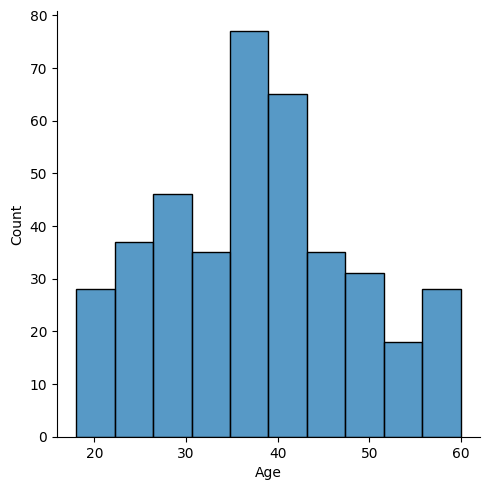

In [ ]:
sns.displot(df.Age)

In [ ]:
df.describe()

Gender         Age  EstimatedSalary   Purchased
count  400.000000  400.000000       400.000000  400.000000
mean     0.490000   37.655000     69742.500000    0.357500
std      0.500526   10.482877     34096.960282    0.479864
min      0.000000   18.000000     15000.000000    0.000000
25%      0.000000   29.750000     43000.000000    0.000000
50%      0.000000   37.000000     70000.000000    0.000000
75%      1.000000   46.000000     88000.000000    1.000000
max      1.000000   60.000000    150000.000000    1.000000

<Axes: ylabel='EstimatedSalary'>

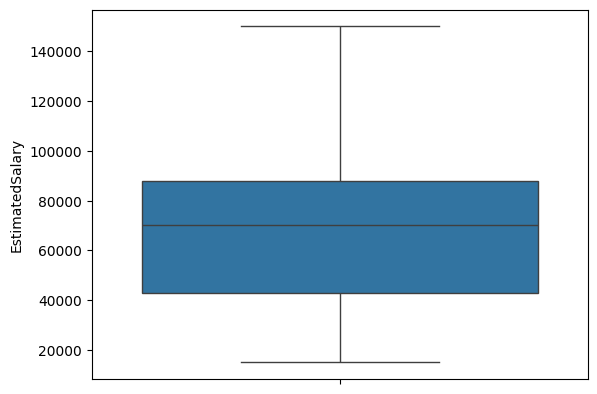

In [ ]:
sns.boxplot(df.EstimatedSalary)

<Axes: ylabel='Age'>

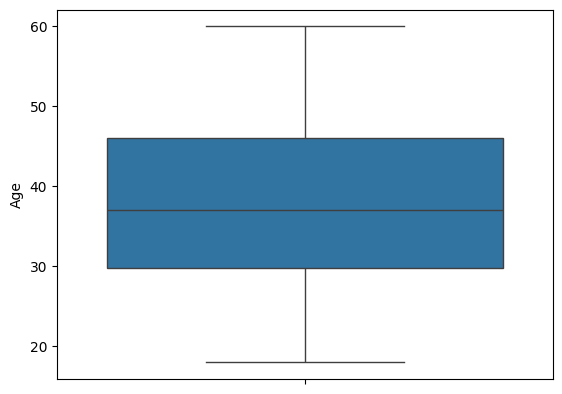

In [ ]:
sns.boxplot(df.Age)

In [ ]:
df.corr()

Gender       Age  EstimatedSalary  Purchased
Gender           1.000000 -0.073741        -0.060435  -0.042469
Age             -0.073741  1.000000         0.155238   0.622454
EstimatedSalary -0.060435  0.155238         1.000000   0.362083
Purchased       -0.042469  0.622454         0.362083   1.000000

<Axes: >

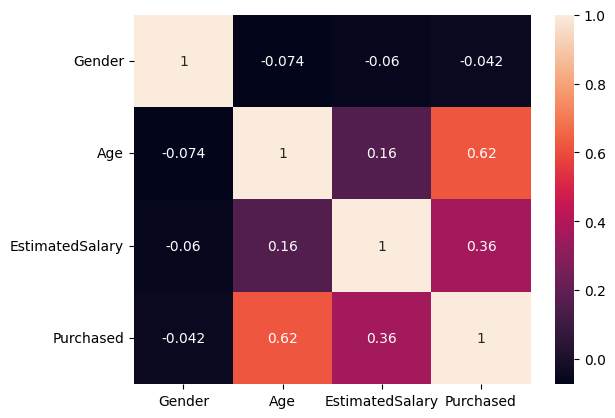

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.corr().Purchased.sort_values(ascending=False)

Purchased          1.000000
Age                0.622454
EstimatedSalary    0.362083
Gender            -0.042469
Name: Purchased, dtype: float64

In [ ]:

# x and y split
X=df.drop(columns=['Purchased'],axis=1)
X

Gender  Age  EstimatedSalary
0         1   19            19000
1         1   35            20000
2         0   26            43000
3         0   27            57000
4         1   19            76000
..      ...  ...              ...
395       0   46            41000
396       1   51            23000
397       0   50            20000
398       1   36            33000
399       0   49            36000

[400 rows x 3 columns]

In [ ]:
X.head()

Gender  Age  EstimatedSalary
0       1   19            19000
1       1   35            20000
2       0   26            43000
3       0   27            57000
4       1   19            76000

In [ ]:
y=df.Purchased
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale= MinMaxScaler()

In [ ]:
scaled_X=pd.DataFrame(scale.fit_transform(X),columns=X.columns)
scaled_X.head()

Gender       Age  EstimatedSalary
0     1.0  0.023810         0.029630
1     1.0  0.404762         0.037037
2     0.0  0.190476         0.207407
3     0.0  0.214286         0.311111
4     1.0  0.023810         0.451852

In [1]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_X,y,test_size=0.2,random_state=0)

NameError: name 'scaled_X' is not defined

In [ ]:
x_train.shape

(320, 3)

In [ ]:
x_test.shape

(80, 3)

In [ ]:
#model building
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

NameError: name 'x_train' is not defined

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
y_pred1=model.predict(x_train)
y_pred1

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,

In [ ]:
Purchased=pd.DataFrame({'Actual value':y_test,'Predicted value':y_pred})
Purchased.head()

Actual value  Predicted value
132             0                0
309             0                0
341             0                0
196             0                0
246             0                0

In [ ]:
Purchased.tail(20)

Actual value  Predicted value
74              0                0
272             1                1
4               0                0
354             1                0
191             0                0
371             1                1
145             0                0
5               0                0
154             0                0
310             0                0
7               1                1
260             0                0
68              0                0
20              1                0
107             0                0
14              0                0
363             0                0
304             0                0
361             1                1
329             1                1

evaluation metrics for classification

In [ ]:
##accuracy score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

In [ ]:
accuracy_score(y_test,y_pred)

0.925

In [ ]:
accuracy_score(y_train,y_pred1)

0.796875

In [ ]:
#confusion matrix
confusion_matrix(y_test,y_pred)

array([[58,  0],
       [ 6, 16]])

In [ ]:
pd.crosstab(y_test,y_pred)

col_0       0   1
Purchased        
0          58   0
1           6  16

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        58
           1       1.00      0.73      0.84        22

    accuracy                           0.93        80
   macro avg       0.95      0.86      0.90        80
weighted avg       0.93      0.93      0.92        80



In [ ]:
#precision
#tp/(tp+fp)
29/30

0.9666666666666667

In [ ]:
#recall
#tp/(fn+tp)
29/(29+18)

0.6170212765957447

In [ ]:
#f1_score
#2*precision *recall/(precision+recall)
2*0.97*0.62/(0.97+0.62)

0.7564779874213836

roc curve

In [ ]:
#Roc-Auc score
probability=model.predict_proba(x_test)[:,1]
probability

array([0.2144872 , 0.25275401, 0.27923866, 0.18905548, 0.19283512,
       0.05077814, 0.07141131, 0.61971028, 0.04489232, 0.45763683,
       0.11656137, 0.10458125, 0.2498842 , 0.39023091, 0.07753816,
       0.3782384 , 0.33667398, 0.06841339, 0.91815959, 0.12317974,
       0.18405501, 0.8529991 , 0.32802683, 0.73435186, 0.03755646,
       0.87354905, 0.17728525, 0.1753795 , 0.27483994, 0.25154865,
       0.08930984, 0.34527554, 0.78827655, 0.24277786, 0.07252234,
       0.03360677, 0.08785064, 0.15688678, 0.0996113 , 0.48076385,
       0.16428821, 0.33335936, 0.15340067, 0.11910455, 0.66423454,
       0.09922975, 0.34848964, 0.7865558 , 0.05454283, 0.70785041,
       0.92388136, 0.11649016, 0.21455017, 0.42591222, 0.88868144,
       0.35155547, 0.18309699, 0.13003618, 0.44394933, 0.03255284,
       0.08417465, 0.78880947, 0.05821796, 0.40782162, 0.02307795,
       0.89114604, 0.12344655, 0.09967335, 0.28809901, 0.44088787,
       0.5335957 , 0.28599525, 0.06358761, 0.30925421, 0.16693

In [ ]:
#roc curve
fpr,tpr,threashsholds=roc_curve(y_test,probability)

Text(0, 0.5, 'TPR')

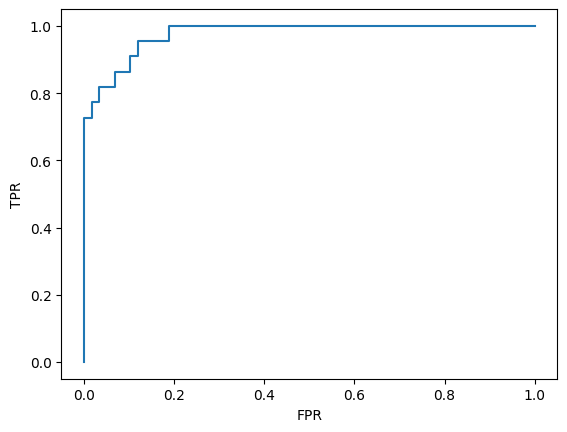

In [ ]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [ ]:
#Auc score
roc_auc_score(y_test,probability)

0.975705329153605